# Practice Exam

### Imporing the relevant libraries

In [ ]:
# The function which will generate the random set of datapoints
# and will distribute them into a specified number of classes
from sklearn.datasets import make_blobs
# A module for handling data
import pandas as pd
# Python's plotting module.
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split
# The K-nearest neighbors classifier from the sklearn library
from sklearn.neighbors import KNeighborsClassifier
# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
# A class that would help us find the best model from a specified set of models.
from sklearn.model_selection import GridSearchCV
# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions
# This library will be used to measure the difference in times between the start and the end of a process
import time
# The Python package for scientific computing
import numpy as np

In [ ]:
inputs, target = make_blobs(n_samples = 90, centers = [(-1, 1), (-2, 5), (4, 0) , (3,6)],
                            random_state = 365, cluster_std =2)

In [ ]:
data = pd.DataFrame(data = inputs, columns = ['Year', 'Price'])
data['Target'] = target
data

,Year,Price,Target
0,5.641679,-1.508918,2
1,1.332526,-0.267110,0
2,4.835685,8.155566,3
3,3.377496,7.704482,3
4,5.035279,7.426342,3
...,...,...,...
85,0.674307,4.544408,3
86,5.935842,-1.331387,2
87,0.241243,2.691087,0
88,-3.145893,5.599640,1


In [ ]:
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

<ipython-input-41-095c3f41cb8a>:18: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'Year', y = 'Price',
<ipython-input-41-095c3f41cb8a>:18: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'Year', y = 'Price',


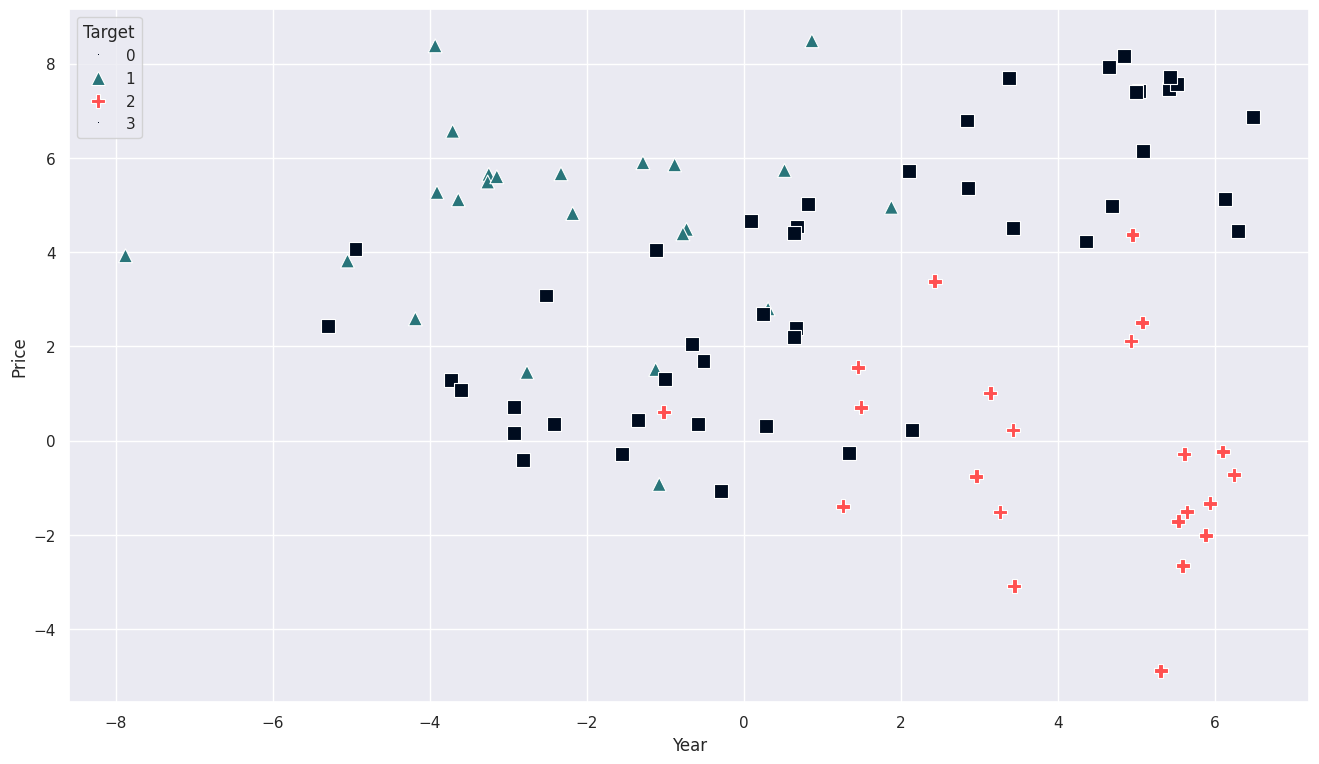

In [ ]:
# Apply the seaborn style
sns.set()

# Set the size of the figure
plt.figure(figsize = (16, 9))

# Create a scatter plot.
# On the x-axis, we have the first feature.
# The y-axis we have placed the second feature.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'markers' parameter determines the shape of the points.
# The 'style' parameter connects markers to classes.
# The 's' parameter specifies the size of the points.
# The 'alpha' parameter controls the opacity of the datapoints.
# We have decided to set the 'legend' parameter equal to False as we will make no use of it in this example.
sns.scatterplot(x = 'Year', y = 'Price',
                data = data,
                hue = 'Target',
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = 'Target',
                s = 100);

### Tony's shop

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.4,
                                                    random_state=365,

                                                    stratify = target)

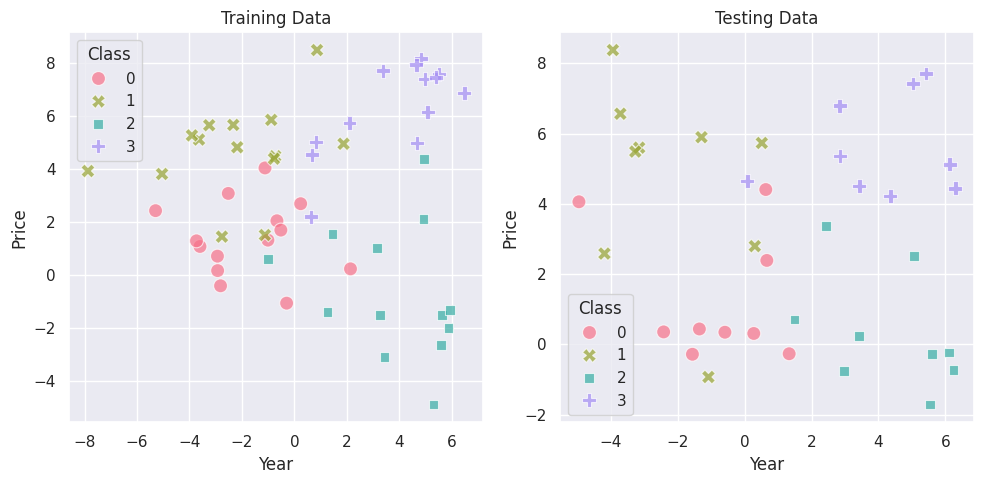

In [ ]:
# Convert them into DataFrames for easier manipulation
X_train_df = pd.DataFrame(x_train, columns=['Year', 'Price'])
X_test_df = pd.DataFrame(x_test, columns=['Year', 'Price'])
y_train_df = pd.DataFrame(y_train, columns=['Target'])
y_test_df = pd.DataFrame(y_test, columns=['Target'])

# Concatenate the features and target labels for plotting
train_data = pd.concat([X_train_df, y_train_df], axis=1)
test_data = pd.concat([X_test_df, y_test_df], axis=1)

# Define the palette for different classes
knn_palette = sns.color_palette("husl", len(train_data['Target'].unique()))

# Plot the training data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Year', y='Price',
                data=train_data,
                hue='Target',
                palette=knn_palette,
                style='Target',
                s=100,
                alpha=0.7)
plt.title('Training Data')
plt.legend(title='Class')

# Plot the testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x='Year', y='Price',
                data=test_data,
                hue='Target',
                palette=knn_palette,
                style='Target',
                s=100,
                alpha=0.7)
plt.title('Testing Data')
plt.legend(title='Class')

plt.tight_layout()
plt.show()


In [ ]:
# Create a classifier and set a specific number of neighbours
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')

# Fit the data
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Define the coordinates of a point whose class we want to identify.
feature_1 = 2
feature_2 = 4

In [ ]:
# Predict the class of a sample given these two features.
clf.predict([[feature_1, feature_2]])

array([3])

In [ ]:
# Create a classifier and set a specific number of neighbours
clf = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')

# Fit the data
clf.fit(x_train, y_train)
clf.predict([[feature_1, feature_2]])

array([3])

In [ ]:
# Create a classifier and set a specific number of neighbours
clf = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

# Fit the data
clf.fit(x_train, y_train)
clf.predict([[feature_1, feature_2]])

array([3])